In [1]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv(r"C:\Users\USER\Desktop/apps.csv")

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()
char=["+",",","$"]
for var in char:
    apps["Installs"] = apps["Installs"].apply(lambda x: x.replace(var, ""))
    apps["Price"] = apps["Price"].apply(lambda x: x.replace(var, ""))



# Print the total number of apps
print('Total number of apps in the dataset = ',apps.shape)


# Have a look at a random sample of 5 rows
print(apps.head())

Total number of apps in the dataset =  (9659, 14)
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size  Installs  Type Price Content Rating  \
0  ART_AND_DESIGN     4.1      159  19.0     10000  Free     0       Everyone   
1  ART_AND_DESIGN     3.9      967  14.0    500000  Free     0       Everyone   
2  ART_AND_DESIGN     4.7    87510   8.7   5000000  Free     0       Everyone   
3  ART_AND_DESIGN     4.5   215644  25.0  50000000  Free     0           Teen   
4  ART_AND_DESIGN     4.3      967   2.8    100000  Free     0       Everyone   

                      Genres      Last Updated        

In [2]:
# List of characters to remove
chars_to_remove = ["+", ",", "$"]
# List of column names to clean
cols_to_clean = ["Installs","Price"]

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


In [3]:
import numpy as np
# Convert Installs to float data type
apps["Installs"] = apps["Installs"].astype("float")

# Convert Price to float data type
apps["Price"] = apps["Price"].astype("float")

# Checking dtypes of the apps dataframe
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


Number of categories =  ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Number of categories =  33
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPIN

C:\Users\USER\AppData\Local\Temp/ipykernel_9488/1937244285.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(num_apps_in_category.index, rotation=90)


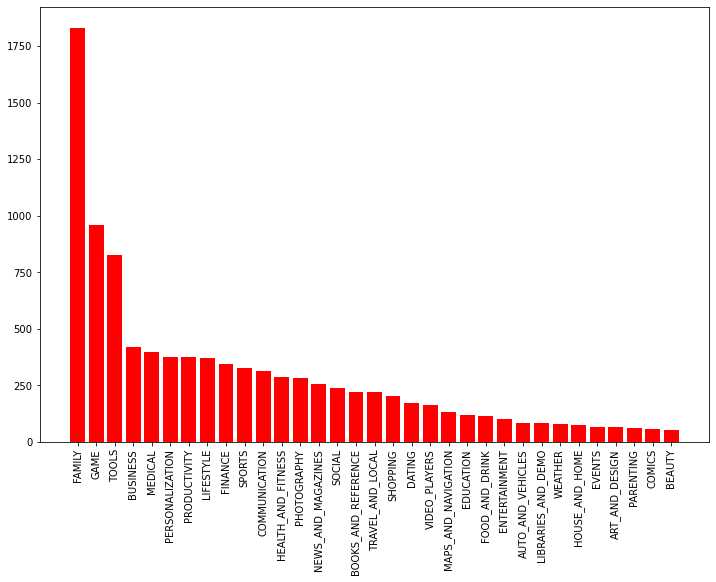

In [4]:
import matplotlib.pyplot as plt

# Print the total number of unique categories
num_categories = apps["Category"].unique()
num_categories1 = len(apps['Category'].unique())
print('Number of categories = ', num_categories)
print('Number of categories = ', num_categories1)

# Count the number of apps in each 'Category'. 
num_apps_in_category =apps["Category"].value_counts()
print(num_apps_in_category)
# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

#method used but plotly modules is not imported yet
#data = [go.Bar(
        #x = num_apps_in_category.index, # index = category name
        #y = num_apps_in_category.values, # value = count
#)]

#plotly.offline.iplot(data)

fig, ax=plt.subplots()
fig.set_size_inches([12,8])
ax.bar(num_apps_in_category.index, num_apps_in_category.values, color="red")
ax.set_xticklabels(num_apps_in_category.index, rotation=90)
plt.show()

Average app rating =  4.173243045387998


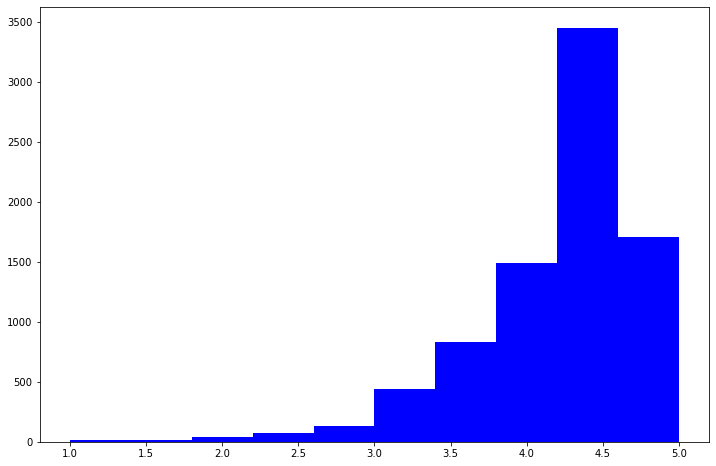

In [5]:
# Average rating of apps
import numpy as np
avg_app_rating =apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
#data = [go.Histogram(
        #x = apps['Rating']
#)]

# Vertical dashed line to indicate the average app rating
#layout = {'shapes': [{
              #'type' :'line',
              #'x0': avg_app_rating,
              #'y0': 0,
              #'x1': avg_app_rating,
              #'y1': 1000,
              #'line': { 'dash': 'dashdot'}
          #}]
          #}

#plotly.offline.iplot({'data': data, 'layout': layout})

fig, ax=plt.subplots()
fig.set_size_inches([12,8])
ax.hist(apps["Rating"], color="blue")
plt.show()

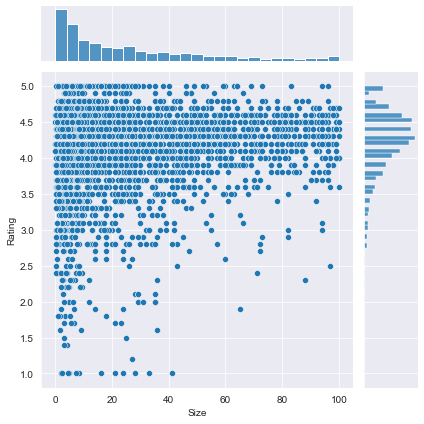

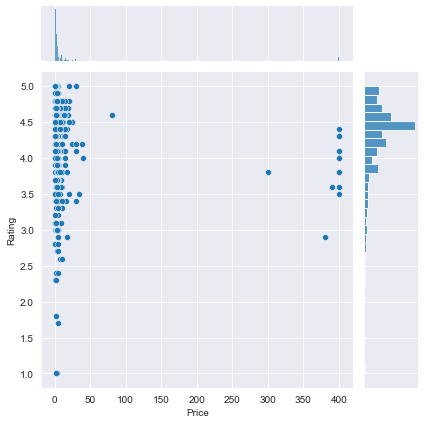

In [6]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps["Rating"].isnull()) & (~apps["Size"].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"])

# Select apps whose 'Type' is 'Paid'
paid_apps =apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"]=="Paid"]

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

       Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         💎 I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.

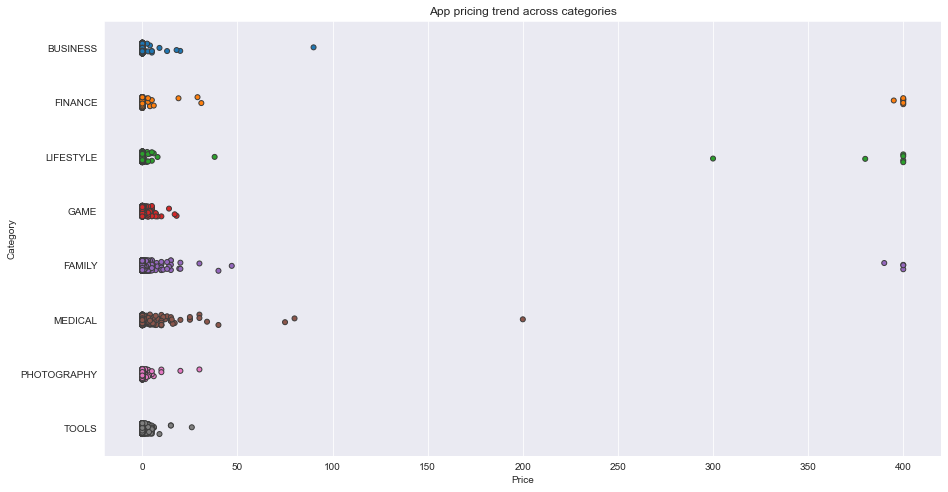

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps["Price"]>200]
print(apps_above_200[['Category', 'App', 'Price']])

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

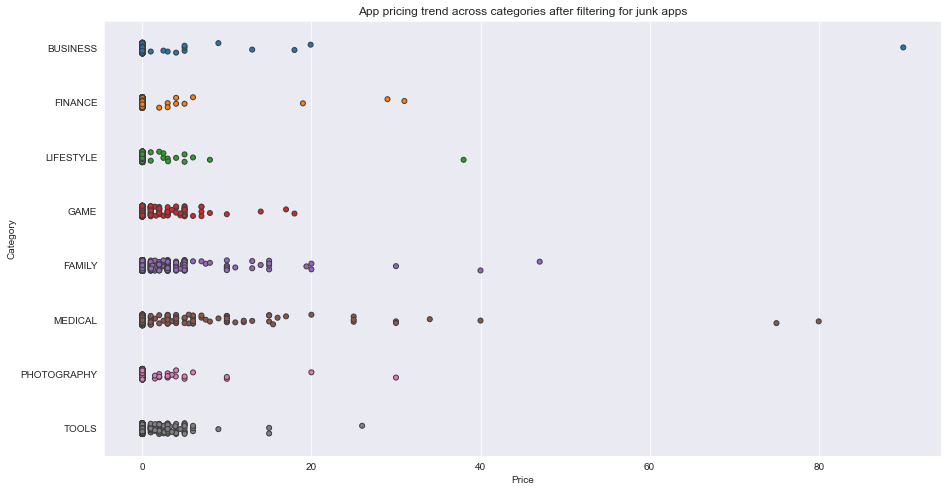

In [8]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"]<100]


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = "Price", y = "Category", data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [9]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

NameError: name 'go' is not defined

In [ ]:
# Load user_reviews.csv
reviews_df = pd.read_csv(r"C:\Users\USER\Desktop/user_reviews.csv")
# Join the two dataframes
merged_df = apps.merge(reviews_df, on="App")
print(merged_df.head())
# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = "Type", y = 'Sentiment_Polarity', data =merged_df)
ax.set_title('Sentiment Polarity Distribution')